In [101]:
import daft
import matplotlib.pyplot as plt

In [95]:
pgm = daft.PGM(dpi=120)

add_pm = True
add_cluster_info = False
add_plate = True

img_id = int(add_pm) + int(add_cluster_info) + int(add_plate)

pgm.add_node("plx", r"$\varpi$", 0, 0, observed=True)
pgm.add_node("r", "$r$", 0, 1)
pgm.add_node("err_plx", r"$\sigma_\varpi$", -1, 0, fixed=True)
if add_cluster_info:
    pgm.add_node("mu_r", r"$\mu_r$", -0.5, 2)
    pgm.add_node("std_r", r"$\sigma_r$", 0.5, 2)
    if add_pm:
        pgm.add_node("mu_vt", r"$\vec{\mu}_{v_{\rm tan}}$", 1.5, 2)
        pgm.add_node("std_vt", r"$\Sigma_{v_{\rm tan}}$", 2.5, 2)

# Add proper motion
if add_pm:
    pgm.add_node("pm", r"$\mu$", 2, 0, observed=True)
    pgm.add_node("vtan", r"$v_{\rm tan}$", 2, 1)
    pgm.add_node("err_tan", r"$\sigma_{\mu}$", 3, 0, fixed=True)

# Edges
pgm.add_edge("r", "plx")
pgm.add_edge("err_plx", "plx")

if add_cluster_info:
    pgm.add_edge("mu_r", "r")
    pgm.add_edge("std_r", "r")

if add_pm:
    pgm.add_edge("err_tan", "pm")
    pgm.add_edge("r", "pm")
    pgm.add_edge("vtan", "pm")
    pgm.add_edge("mu_vt", "vtan")
    pgm.add_edge("std_vt", "vtan")

if add_plate:
    pgm.add_plate([-1.25, -0.5, 4.5, 2], label=r"$n = 1...N$", position="bottom center")

pgm.render()
plt.savefig(f"/Users/ratzenboe/Desktop/retreat/cluster_model_{img_id}.png")

KeyError: 'mu_vt'

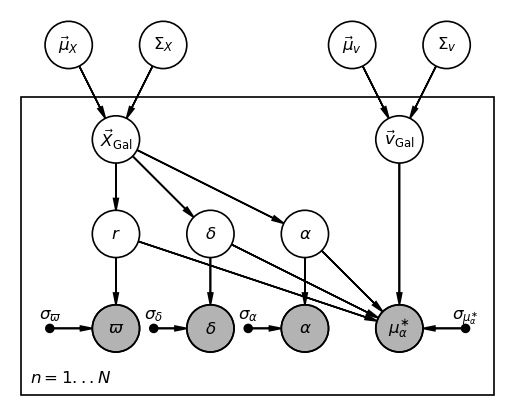

In [119]:
pgm = daft.PGM(dpi=120)

add_pm = True
add_cluster_info = True
add_plate = True

img_id = int(add_pm) + int(add_cluster_info) + int(add_plate)

pgm.add_node("plx", r"$\varpi$", 0, 0, observed=True)
pgm.add_node("r", "$r$", 0, 1)
pgm.add_node("err_plx", r"$\sigma_\varpi$", -0.7, 0, fixed=True)

if add_cluster_info:
    pgm.add_node("x", r"$\vec{X}_{\rm Gal}$", 0, 2)
    pgm.add_node("mu_r", r"$\vec{\mu}_X$", -0.5, 3)
    pgm.add_node("std_r", r"$\Sigma_X$", 0.5, 3)
    if add_pm:
        pgm.add_node("mu_vgal", r"$\vec{\mu}_{v}$", 2.5, 3)
        pgm.add_node("std_vgal", r"$\Sigma_{v}$", 3.5, 3)

# Add proper motion
if add_pm:
    pgm.add_node("pm", r"$\mu_\alpha^{\ast}$", 3, 0, observed=True)
    pgm.add_node("vgal", r"$\vec{v}_{\rm Gal}$", 3, 2)
    pgm.add_node("err_gal", r"$\sigma_{\mu_{\alpha}^{\ast}}$", 3.7, 0, fixed=True)

    pgm.add_node("alpha", r"$\alpha$", 2, 1, observed=False)
    pgm.add_node("delta", r"$\delta$", 1, 1, observed=False)
    # Observed
    pgm.add_node("alpha_obs", r"$\alpha$", 2, 0, observed=True)
    pgm.add_node("delta_obs", r"$\delta$", 1, 0, observed=True)
    # Error
    pgm.add_node("err_alpha_obs", r"$\sigma_{\alpha}$", 1.4, 0, fixed=True)
    pgm.add_node("err_delta_obs", r"$\sigma_{\delta}$", 0.4, 0, fixed=True)
    
    
# Edges
pgm.add_edge("r", "plx")
pgm.add_edge("err_plx", "plx")

if add_cluster_info:
    pgm.add_edge("mu_r", "x")
    pgm.add_edge("std_r", "x")
    pgm.add_edge("x", "r")

if add_pm:
    pgm.add_edge("err_gal", "pm")
    pgm.add_edge("r", "pm")
    pgm.add_edge("vgal", "pm")
    pgm.add_edge("mu_vgal", "vgal")
    pgm.add_edge("std_vgal", "vgal")
    pgm.add_edge("delta", "pm")
    pgm.add_edge("err_delta_obs", "delta_obs")
    pgm.add_edge("err_alpha_obs", "alpha_obs")
    pgm.add_edge("x", "delta")
    pgm.add_edge("x", "alpha")
    pgm.add_edge("alpha", "pm")
    pgm.add_edge("alpha", "alpha_obs")
    pgm.add_edge("delta", "delta_obs")

if add_plate:
    if add_pm:
        pgm.add_plate([-1., -0.7, 5, 3.15], label=r"$n = 1...N$", position="bottom left")
    else:
        pgm.add_plate([-1., -0.7, 2, 3.15], label=r"$n = 1...N$", position="bottom left")

pgm.render()
plt.savefig(f"/Users/ratzenboe/Desktop/retreat/cluster_model_2_{img_id}.png", dpi=200)